112.347146739
[   5   27   50   71   91  113  135  158  180  201  223  246  268  294  323
  345  370  391  413  436  456  479  502  523  546  569  593  614  636  657
  677  699  723  745  769  792  818  843  867  889  911  934  955  979 1001
 1025 1050 1076 1099 1124 1146 1167 1188 1211 1233 1257]
[  0.11609977   0.62693878   1.16099773   1.64861678   2.11301587
   2.62385488   3.13469388   3.66875283   4.17959184   4.66721088
   5.17804989   5.71210884   6.22294785   6.82666667   7.50004535
   8.01088435   8.59138322   9.07900227   9.58984127  10.12390023
  10.58829932  11.12235828  11.65641723  12.14403628  12.67809524
  13.2121542   13.76943311  14.25705215  14.76789116  15.2555102
  15.7199093   16.2307483   16.78802721  17.29886621  17.85614512
  18.39020408  18.9939229   19.57442177  20.13170068  20.64253968
  21.15337868  21.68743764  22.17505669  22.7323356   23.2431746
  23.80045351  24.38095238  24.9846712   25.51873016  26.09922902
  26.61006803  27.09768707  27.58530612  28

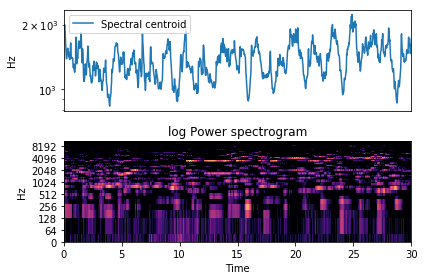

In [8]:
from __future__ import print_function
import librosa
import librosa.display
import numpy as np
import pylab
import matplotlib.pyplot as plt

filename = 'gtzan/_test/classical.00001.au'

y, sr = librosa.load(filename)

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
# mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=)
print(tempo)
print(beat_frames)

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)
# plt.show()

# librosa.output.times_csv('beat_times.csv', beat_times)

hop_length = 512
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

cent = librosa.feature.spectral_centroid(y=y, sr=sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

plt.show()

In [4]:
filename = 'gtzan/_test/hiphop.00001.au'

y, sr = librosa.load(filename)

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
# mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=)
print(tempo)
print(beat_frames)

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)
# plt.show()

# librosa.output.times_csv('beat_times.csv', beat_times)

hop_length = 512

y_harmonic, y_percussive = librosa.effects.hpss(y)

tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)

mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

mfcc_delta = librosa.feature.delta(mfcc)

beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)

chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

beat_chroma = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

# save_path = "specs/toothSpec.jpg"

print(mfcc)

92.28515625
[  22   50   79  111  135  161  191  220  248  277  306  336  362  391  419
  447  476  504  533  563  590  618  646  673  698  727  758  786  816  843
  873  901  929  958  987 1018 1044 1072 1100 1128 1157 1184 1214]
[  0.510839     1.16099773   1.83437642   2.57741497   3.13469388
   3.7384127    4.43501134   5.10839002   5.75854875   6.43192744
   7.10530612   7.80190476   8.40562358   9.07900227   9.729161
  10.37931973  11.05269841  11.70285714  12.37623583  13.07283447
  13.69977324  14.34993197  15.0000907   15.62702948  16.20752834
  16.88090703  17.60072562  18.25088435  18.94748299  19.57442177
  20.27102041  20.92117914  21.57133787  22.24471655  22.91809524
  23.63791383  24.24163265  24.89179138  25.54195011  26.19210884
  26.86548753  27.4924263   28.18902494]
[[  -6.16260426  -12.64988695  -40.21797969 ..., -145.34252922
  -162.67263004 -173.16741097]
 [  49.55331845   43.83968066   33.50214065 ...,   16.54709545
    21.79906244   32.4190897 ]
 [ -37.4313742